In [1]:
import pandas as pd
import numpy as np

### load data

In [2]:
train_data_x = np.load("E:\\school\\2-2\\AI\\Project2\\data\\train_x_100_5.npy")
train_data_y = np.load("E:\\school\\2-2\\AI\\Project2\\data\\train_y.npy")
test_data_x = np.load("E:\\school\\2-2\\AI\\Project2\\data\\test_x_100_5.npy")

In [3]:
train_data_x.shape

(25000, 100)

In [4]:
train_data_x = train_data_x.reshape(25000,100,1)

###  using Keras CNN

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv1D, GlobalMaxPooling1D

Using TensorFlow backend.


In [6]:
model = Sequential()
model.add(Conv1D(filters=128,
                 kernel_size=3,
                 activation='relu',
                 strides=1,
                 input_shape=(100, 1)))

model.add(GlobalMaxPooling1D())

model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(train_data_x, train_data_y,
          epochs=10, shuffle= True,
          batch_size=32, validation_split=0.2)

model.evaluate(train_data_x, train_data_y, batch_size=32)

Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 14s 704us/step - loss: 0.6385 - acc: 0.6287 - val_loss: 0.6004 - val_acc: 0.6828
Epoch 2/10
20000/20000 [==============================] - 14s 686us/step - loss: 0.6102 - acc: 0.6640 - val_loss: 0.5953 - val_acc: 0.6868
Epoch 3/10
20000/20000 [==============================] - 14s 692us/step - loss: 0.5979 - acc: 0.6759 - val_loss: 0.5907 - val_acc: 0.6890
Epoch 4/10
20000/20000 [==============================] - 13s 669us/step - loss: 0.5929 - acc: 0.6823 - val_loss: 0.5878 - val_acc: 0.6896
Epoch 5/10
20000/20000 [==============================] - 13s 645us/step - loss: 0.5914 - acc: 0.6831 - val_loss: 0.5899 - val_acc: 0.6858
Epoch 6/10
20000/20000 [==============================] - 13s 647us/step - loss: 0.5892 - acc: 0.6839 - val_loss: 0.5937 - val_acc: 0.6822
Epoch 7/10
20000/20000 [==========

[0.5732823976898194, 0.69568]

### draw ROC curve

In [7]:
from sklearn.metrics import roc_curve
y_pred = model.predict(train_data_x).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(train_data_y, y_pred)

In [8]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

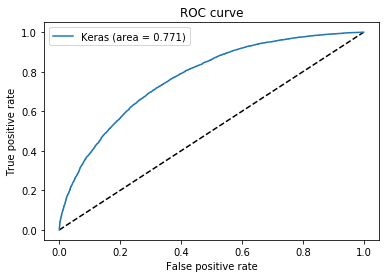

In [15]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

### predict test data

In [10]:
# test_data_y = model.predict(test_data_x)

### sava result

In [11]:
# test_id = pd.read_csv('E:\\school\\2-2\\AI\\Project2\\data\\testData.tsv', sep="\t", header=0)

In [12]:
# test_y_path = 'E:\\school\\2-2\\AI\\Project2\\data\\w2vKeras.csv'

In [13]:
# test_id['sentiment'] = test_data_y

In [14]:
# test_id.to_csv(test_y_path, columns=['id', 'sentiment'], index=0)